In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
#Reading the csv file
data = pd.read_csv(r"D:\A.csv")

In [5]:
#Columns of the data
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Wweight', 'Sweight', 'Vweight',
       'ssweight', 'Rings'],
      dtype='object')

In [7]:
data["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [8]:
data["Sex"].replace("M",1, inplace=True)
data["Sex"].replace("F",2,inplace=True)
data["Sex"].replace("I",3,inplace=True)

In [9]:
#Feature Selection Technique

[0.03705547 0.13080474 0.12967883 0.11773223 0.14788987 0.14644055
 0.13995279 0.15044552]


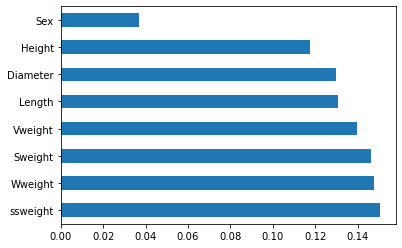

In [10]:
features1=data.drop("Rings", axis=1)
target1 = data["Rings"] 
model = ExtraTreesClassifier(n_estimators=100)
model.fit(features1,target1)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=features1.columns)
feat_importances.nlargest(1000).plot(kind='barh')
plt.show()

In [11]:
data.head()

,Sex,Length,Diameter,Height,Wweight,Sweight,Vweight,ssweight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


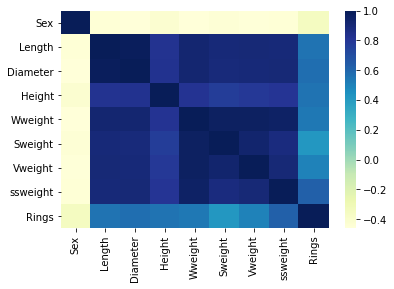

In [12]:
def heatmap1(x):
    return sns.heatmap(x.corr(),cmap="YlGnBu")
heatmap1(data)

In [13]:
#Delete a column 

In [14]:
#DROP SEX
data=data.drop("Sex",axis=1)

In [15]:
#Variables features and target
features=data.drop("Rings", axis=1)
target=data["Rings"]
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.33,random_state=42)

In [16]:
data.sum

<bound method DataFrame.sum of       Length  Diameter  Height  Wweight  Sweight  Vweight  ssweight  Rings
0      0.455     0.365   0.095   0.5140   0.2245   0.1010    0.1500     15
1      0.350     0.265   0.090   0.2255   0.0995   0.0485    0.0700      7
2      0.530     0.420   0.135   0.6770   0.2565   0.1415    0.2100      9
3      0.440     0.365   0.125   0.5160   0.2155   0.1140    0.1550     10
4      0.330     0.255   0.080   0.2050   0.0895   0.0395    0.0550      7
...      ...       ...     ...      ...      ...      ...       ...    ...
4172   0.565     0.450   0.165   0.8870   0.3700   0.2390    0.2490     11
4173   0.590     0.440   0.135   0.9660   0.4390   0.2145    0.2605     10
4174   0.600     0.475   0.205   1.1760   0.5255   0.2875    0.3080      9
4175   0.625     0.485   0.150   1.0945   0.5310   0.2610    0.2960     10
4176   0.710     0.555   0.195   1.9485   0.9455   0.3765    0.4950     12

[4177 rows x 8 columns]>

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Length    4177 non-null   float64
 1   Diameter  4177 non-null   float64
 2   Height    4177 non-null   float64
 3   Wweight   4177 non-null   float64
 4   Sweight   4177 non-null   float64
 5   Vweight   4177 non-null   float64
 6   ssweight  4177 non-null   float64
 7   Rings     4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [18]:
data.describe()

,Length,Diameter,Height,Wweight,Sweight,Vweight,ssweight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [19]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Wweight', 'Sweight', 'Vweight',
       'ssweight', 'Rings'],
      dtype='object')

In [20]:
#VIOLIN PLOT 

(array([ 786., 1052.,  962.,  775.,  399.,  123.,   46.,   24.,    7.,
           3.]),
 array([1.0000e-03, 1.4970e-01, 2.9840e-01, 4.4710e-01, 5.9580e-01,
        7.4450e-01, 8.9320e-01, 1.0419e+00, 1.1906e+00, 1.3393e+00,
        1.4880e+00]),
 <a list of 10 Patch objects>)

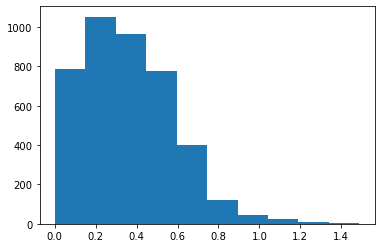

In [32]:
plt.hist(data.Sweight)

(array([632., 783., 827., 824., 616., 286., 129.,  58.,  16.,   6.]),
 array([2.00000e-03, 2.84350e-01, 5.66700e-01, 8.49050e-01, 1.13140e+00,
        1.41375e+00, 1.69610e+00, 1.97845e+00, 2.26080e+00, 2.54315e+00,
        2.82550e+00]),
 <a list of 10 Patch objects>)

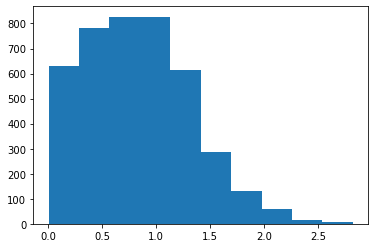

In [33]:
plt.hist(data.Wweight)

(array([   7.,   60.,  147.,  304.,  460.,  778., 1051., 1017.,  324.,
          29.]),
 array([0.075, 0.149, 0.223, 0.297, 0.371, 0.445, 0.519, 0.593, 0.667,
        0.741, 0.815]),
 <a list of 10 Patch objects>)

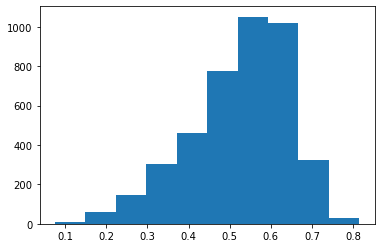

In [34]:
plt.hist(data.Length)

(array([  13.,   66.,  180.,  344.,  513.,  812., 1017.,  934.,  275.,
          23.]),
 array([0.055 , 0.1145, 0.174 , 0.2335, 0.293 , 0.3525, 0.412 , 0.4715,
        0.531 , 0.5905, 0.65  ]),
 <a list of 10 Patch objects>)

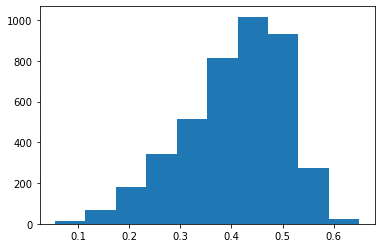

In [35]:
plt.hist(data.Diameter)

(array([8.350e+02, 9.990e+02, 1.027e+03, 7.470e+02, 3.630e+02, 1.470e+02,
        5.000e+01, 7.000e+00, 1.000e+00, 1.000e+00]),
 array([5.0000e-04, 7.6450e-02, 1.5240e-01, 2.2835e-01, 3.0430e-01,
        3.8025e-01, 4.5620e-01, 5.3215e-01, 6.0810e-01, 6.8405e-01,
        7.6000e-01]),
 <a list of 10 Patch objects>)

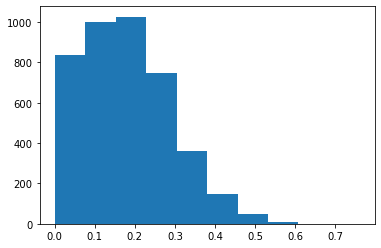

In [36]:
plt.hist(data.Vweight)

In [37]:
#HEAT MAP

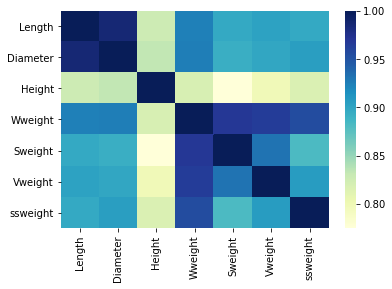

In [38]:
heatmap1(features)

In [39]:
print(X_train.var().round(3).to_string())

Length      0.014
Diameter    0.010
Height      0.002
Wweight     0.243
Sweight     0.050
Vweight     0.012
ssweight    0.020


Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
def LR(F,T):
  #  features=data.drop("Rings", axis=1)
   # target=data["Rings"]
    X_train,X_test,Y_train,Y_test = train_test_split(F,T,test_size=0.33,random_state=42)
    ModelLR = LinearRegression().fit(X_train, Y_train)
   # print("Test score "+str(ModelLR.score(X_test, Y_test)))
   # print("Train score "+str(ModelLR.score(X_train, Y_train)))
    predLR = ModelLR.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(Y_test,predLR))
  #  print(RMSE)
    return RMSE

SVC

In [41]:
from sklearn.svm import SVR
def SV(F,T):
   #features=data.drop("Rings", axis=1)
   #target=data["Rings"]
   X_train,X_test,Y_train,Y_test = train_test_split(F,T,test_size=0.33,random_state=42)
   svr_rbf = SVR(kernel='rbf', C=100, gamma=1, epsilon=.01).fit(X_train, Y_train)
   svr_lin = SVR(kernel='linear', C=100, gamma='auto').fit(X_train, Y_train)
   svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1).fit(X_train, Y_train)

   #print("Test score for rbf :",str(svr_rbf.score(X_test, Y_test)))
   #print("Test score for lin :",str(svr_rbf.score(X_test, Y_test)))
   #print("Test score for poly :",str(svr_rbf.score(X_test, Y_test)))
   predSVR = svr_rbf.predict(X_test)
   RMSE = np.sqrt(mean_squared_error(Y_test,predSVR))
  # print(RMSE)
   return RMSE

Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
def DT(F,T): 
#  features=data.drop("Rings", axis=1)
 # target=data["Rings"]
  X_train,X_test,Y_train,Y_test = train_test_split(F,T,test_size=0.33,random_state=42)
  ModelDT = DecisionTreeRegressor()
  ModelDT.fit(X_train,Y_train)
  #print("Test score "+str(ModelDT.score(X_test, Y_test)))
  #print("Train score "+str(ModelDT.score(X_train, Y_train)))
  predDT = ModelDT.predict(X_test)
  RMSE = np.sqrt(mean_squared_error(Y_test,predDT))
 # print(RMSE)
  return RMSE

Random Forest 

In [43]:
from sklearn.ensemble import RandomForestRegressor
def RF(F,T): 
#  features=data.drop("Rings", axis=1)
 # target=data["Rings"]
  X_train,X_test,Y_train,Y_test = train_test_split(F,T,test_size=0.33,random_state=42) 
  ModelRF = RandomForestRegressor(n_estimators=10)
  ModelRF.fit(X_train, Y_train)
  #print("Test score "+str(ModelRF.score(X_test, Y_test)))
  #print("Train score "+str(ModelRF.score(X_train, Y_train)))
  predRF = ModelRF.predict(X_test)
  RMSE = np.sqrt(mean_squared_error(Y_test,predRF))
 # print(RMSE)
  return RMSE

KNN

In [44]:
def KNN(F,T):
  # features=data.drop("Rings", axis=1)
  # target=data["Rings"]
   X_train,X_test,Y_train,Y_test = train_test_split(F,T,test_size=0.33,random_state=42)
   ModelKN = KNeighborsRegressor(n_neighbors = 7)
   ModelKN.fit(X_train,Y_train)
   #print("Test score "+str(ModelKN.score(X_test, Y_test)))
   #print("Train score "+str(ModelKN.score(X_train, Y_train)))
   predKN = ModelKN.predict(X_test)
   RMSE = np.sqrt(mean_squared_error(Y_test,predKN))
  # print(RMSE)
   return RMSE 


Bagging Regression

In [45]:
def BC(F,T):
 #  features=data.drop("Rings", axis=1)
  # target=data["Rings"]
   X_train,X_test,Y_train,Y_test = train_test_split(F,T,test_size=0.33,random_state=42)
   ModelBC = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
   ModelBC.fit(X_train,Y_train)
  # print("Test score "+str(ModelBC.score(X_test, Y_test)))
  # print("Train score "+str(ModelBC.score(X_train, Y_train)))
   predBC = ModelBC.predict(X_test)
   RMSE = np.sqrt(mean_squared_error(Y_test,predBC))
  # print(RMSE)
   return RMSE

AdaBoost Regression

In [46]:
def AB(F,T):
   # features=data.drop("Rings", axis=1)
    #target=data["Rings"]
    X_train,X_test,Y_train,Y_test = train_test_split(F,T,test_size=0.33,random_state=42)
    ModelAB = AdaBoostRegressor()
    ModelAB.fit(X_train,Y_train)
   # print("Test score "+str(ModelAB.score(X_test, Y_test)))
   # print("Train score "+str(ModelAB.score(X_train, Y_train)))
    predAB = ModelAB.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(Y_test,predAB))
   # print(RMSE)
    return RMSE 

Gradient Boosting 

In [47]:
def GBC(F,T):
  # features=data.drop("Rings", axis=1)
  # target=data["Rings"]
   X_train,X_test,Y_train,Y_test = train_test_split(F,T,test_size=0.33,random_state=42)
   from sklearn.ensemble import GradientBoostingClassifier
   ModelGBC = GradientBoostingClassifier(random_state=0)
   ModelGBC.fit(X_train,Y_train)
   #print("Test score "+str(ModelGBC.score(X_test, Y_test)))
   #print("Train score "+str(ModelGBC.score(X_train, Y_train)))
   predGBC = ModelGBC.predict(X_test)
   RMSE = np.sqrt(mean_squared_error(Y_test,predGBC))
   #print(RMSE)
   return RMSE

ORIGINAL DATA 

In [48]:
F=data.drop("Rings", axis=1)
T=data["Rings"]
ORIGINAL_LR=LR(F,T)
ORIGINAL_DT=DT(F,T)
ORIGINAL_RF=RF(F,T)
ORIGINAL_KNN=KNN(F,T)
ORIGINAL_AB=AB(F,T)
ORIGINAL_SVR=SV(F,T)
ORIGINAL_BC=BC(F,T)
ORIGINAL_GBC=GBC(F,T)



ORIGINAL = pd.DataFrame({
"Models" : ["Linear Regression", "Decision Tree", "Random Forest","SVR", "KNN", "Ada Boost", "Boosting", "Gradient Boost"],
"Original RMSE" : [ORIGINAL_LR,ORIGINAL_DT,ORIGINAL_RF,ORIGINAL_SVR,ORIGINAL_KNN,ORIGINAL_AB,ORIGINAL_BC,ORIGINAL_GBC]
})

print(ORIGINAL)



              Models  Original RMSE
0  Linear Regression       2.224529
1      Decision Tree       3.006037
2      Random Forest       2.355344
3                SVR       2.126135
4                KNN       2.216134
5          Ada Boost       2.925610
6           Boosting       2.326245
7     Gradient Boost       2.633251


Variance Influence Factor

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X= data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Length,695.083714
1,Diameter,748.879248
2,Height,42.117537
3,Wweight,421.579746
4,Sweight,101.575906
5,Vweight,63.348265
6,ssweight,81.772105


In [50]:
#Diameter has the maximum VIF....let's remove it 

In [51]:
X = data.drop(['Diameter','Rings'],axis=1)
calc_vif(X)

,variables,VIF
0,Length,40.828884
1,Height,41.541446
2,Wweight,421.315969
3,Sweight,101.546201
4,Vweight,63.267967
5,ssweight,80.738646


In [52]:
#Let's remove Diameter from the data and try 


In [53]:
Data_WTD=data.drop("Diameter", axis=1)


In [54]:
F_WTD=data.drop("Rings", axis=1)
T_WTD=data["Rings"]
WT_D_LR=LR(F_WTD,T_WTD)
WT_D_DT=DT(F_WTD,T_WTD)
WT_D_RF=RF(F_WTD,T_WTD)
WT_D_KNN=KNN(F_WTD,T_WTD)
WT_D_AB=AB(F_WTD,T_WTD)
WT_D_SVR=SV(F_WTD,T_WTD)
WT_D_BC=BC(F_WTD,T_WTD)
WT_D_GBC=GBC(F_WTD,T_WTD)



ORIGINAL = pd.DataFrame({
"Model" : ["Linear Regression", "Decision Tree", "Random Forest","SVR", "KNN", "Ada Boost", "Boosting", "Gradient Boost"],
"Original RMSE" : [ORIGINAL_LR,ORIGINAL_DT,ORIGINAL_RF,ORIGINAL_SVR,ORIGINAL_KNN,ORIGINAL_AB,ORIGINAL_BC,ORIGINAL_GBC],
    "No Diameter RMSE": [WT_D_LR,WT_D_DT,WT_D_RF,WT_D_SVR,WT_D_KNN,WT_D_AB,WT_D_BC,WT_D_GBC]
})

print(ORIGINAL)

               Model  Original RMSE  No Diameter RMSE
0  Linear Regression       2.224529          2.224529
1      Decision Tree       3.006037          2.987890
2      Random Forest       2.355344          2.332522
3                SVR       2.126135          2.126135
4                KNN       2.216134          2.216134
5          Ada Boost       2.925610          2.735127
6           Boosting       2.326245          2.286028
7     Gradient Boost       2.633251          2.633251


In [55]:
#Remove both Wweight and Diameter for VIF

In [56]:
X = data.drop(['Wweight','Diameter','Rings'],axis=1)
calc_vif(X)

,variables,VIF
0,Length,40.727775
1,Height,41.531111
2,Sweight,29.856146
3,Vweight,38.029878
4,ssweight,26.107574


In [57]:
#Let's remove diameter and Wweight from the data

In [58]:
Data_WTDWw=data.drop(["Diameter","Wweight"], axis=1)

In [59]:
F_WTDww=data.drop("Rings", axis=1)
T_WTDww=data["Rings"]

WT_DWw_LR=LR(F_WTDww,T_WTDww)
WT_DWw_DT=DT(F_WTDww,T_WTDww)
WT_DWw_RF=RF(F_WTDww,T_WTDww)
WT_DWw_KNN=KNN(F_WTDww,T_WTDww)
WT_DWw_AB=AB(F_WTDww,T_WTDww)
WT_DWw_SVR=SV(F_WTDww,T_WTDww)
WT_DWw_BC=BC(F_WTDww,T_WTDww)
WT_DWw_GBC=GBC(F_WTDww,T_WTDww)



ORIGINAL = pd.DataFrame({
"Model" : ["Linear Regression", "Decision Tree", "Random Forest","SVR", "KNN", "Ada Boost", "Boosting", "Gradient Boost"],
"Original RMSE" : [ORIGINAL_LR,ORIGINAL_DT,ORIGINAL_RF,ORIGINAL_SVR,ORIGINAL_KNN,ORIGINAL_AB,ORIGINAL_BC,ORIGINAL_GBC],
    "No Diameter RMSE ": [WT_D_LR,WT_D_DT,WT_D_RF,WT_D_SVR,WT_D_KNN,WT_D_AB,WT_D_BC,WT_D_GBC],
    "No Diameter&WW RMSE ": [WT_DWw_LR,WT_DWw_DT,WT_DWw_RF,WT_DWw_SVR,WT_DWw_KNN,WT_DWw_AB,WT_DWw_BC,WT_DWw_GBC]
})

print(ORIGINAL)

               Model  Original RMSE  No Diameter RMSE   No Diameter&WW RMSE 
0  Linear Regression       2.224529           2.224529              2.224529
1      Decision Tree       3.006037           2.987890              3.092600
2      Random Forest       2.355344           2.332522              2.287482
3                SVR       2.126135           2.126135              2.126135
4                KNN       2.216134           2.216134              2.216134
5          Ada Boost       2.925610           2.735127              2.832891
6           Boosting       2.326245           2.286028              2.260780
7     Gradient Boost       2.633251           2.633251              2.633251


In [60]:
#Feature Selection 

[0.13582714 0.12970519 0.12193892 0.14991124 0.15431737 0.15036405
 0.15793608]


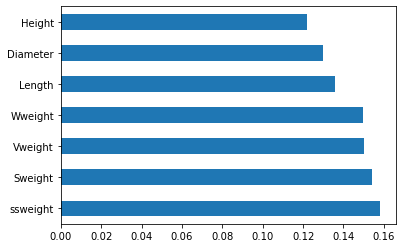

In [61]:
features1=data.drop("Rings", axis=1)
target1 = data["Rings"] 
model = ExtraTreesClassifier(n_estimators=100)
model.fit(features1,target1)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=features1.columns)
feat_importances.nlargest(1000).plot(kind='barh')
plt.show()

In [62]:
#Using Feature Selection for Multiple Regression Analysis 

In [63]:
def Models(x):
    return smf.ols(x,data=data).fit().summary()

In [64]:
y='Rings~Vweight+Wweight+Sweight+ssweight'
Models(y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     1026.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:46:40   Log-Likelihood:                -9386.2
No. Observations:                4177   AIC:                         1.878e+04
Df Residuals:                    4172   BIC:                         1.881e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7299      0.071     94.591      0.000       6.590       6.869
Vweight       -6.9888      1.329     -5.259      0.000      -9.594      -4.384
Wweight        9.7624      0.756     12.914      0.000       8.280      11.244
Sweight      -19.0166      0.841    -22.613      0.000     -20.665     -17.368
ssweight      13.4380      1.135     11.841      0.000      11.213      15.663
==============================================================================
Omnibus:                      848.651   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2263.548
Skew:                           1.086   Prob(JB):                         0.00
Kurtosis:                       5.879   Cond. No.                         67.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
y='Rings~ssweight'
Models(y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     2713.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:46:40   Log-Likelihood:                -9770.8
No. Observations:                4177   AIC:                         1.955e+04
Df Residuals:                    4175   BIC:                         1.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4621      0.077     83.764      0.000       6.311       6.613
ssweight      14.5357      0.279     52.084      0.000      13.989      15.083
==============================================================================
Omnibus:                     1213.646   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3601.423
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                       6.414   Cond. No.                         7.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
y='Rings~Vweight+Wweight+Sweight'
Models(y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     1278.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:46:40   Log-Likelihood:                -9455.3
No. Observations:                4177   AIC:                         1.892e+04
Df Residuals:                    4173   BIC:                         1.894e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9001      0.071     97.417      0.000       6.761       7.039
Vweight      -11.9416      1.282     -9.314      0.000     -14.455      -9.428
Wweight       17.2331      0.423     40.711      0.000      16.403      18.063
Sweight      -25.2991      0.663    -38.142      0.000     -26.599     -23.999
==============================================================================
Omnibus:                      826.920   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2157.207
Skew:                           1.068   Prob(JB):                         0.00
Kurtosis:                       5.799   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
z='Rings~Sweight+Vweight+ssweight+Length+Diameter'
Models(z)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     842.6
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:46:40   Log-Likelihood:                -9358.2
No. Observations:                4177   AIC:                         1.873e+04
Df Residuals:                    4171   BIC:                         1.877e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1440      0.272     11.542      0.000       2.610       3.678
Sweight      -11.7161      0.472    -24.836      0.000     -12.641     -10.791
Vweight        0.9978      1.047      0.953      0.341      -1.056       3.051
ssweight      21.0710      0.693     30.403      0.000      19.712      22.430
Length        -1.5047      1.871     -0.804      0.421      -5.174       2.164
Diameter      16.1222      2.279      7.075      0.000      11.654      20.590
==============================================================================
Omnibus:                     1062.625   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3151.866
Skew:                           1.310   Prob(JB):                         0.00
Kurtosis:                       6.354   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
z='Rings~Height'
Models(z)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:46:40   Log-Likelihood:                -10039.
No. Observations:                4177   AIC:                         2.008e+04
Df Residuals:                    4175   BIC:                         2.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9385      0.144     27.302      0.000       3.656       4.221
Height        42.9714      0.990     43.388      0.000      41.030      44.913
==============================================================================
Omnibus:                     1152.248   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80909.975
Skew:                           0.369   Prob(JB):                         0.00
Kurtosis:                      24.549   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
z='Rings~Sweight+Vweight+ssweight+Length'
Models(z)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1029.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:46:40   Log-Likelihood:                -9383.1
No. Observations:                4177   AIC:                         1.878e+04
Df Residuals:                    4172   BIC:                         1.881e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1694      0.274     11.568      0.000       2.632       3.707
Sweight      -11.7102      0.474    -24.679      0.000     -12.640     -10.780
Vweight        0.8714      1.053      0.827      0.408      -1.194       2.937
ssweight      22.2694      0.676     32.944      0.000      20.944      23.595
Length        10.4897      0.797     13.164      0.000       8.927      12.052
==============================================================================
Omnibus:                     1069.660   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3225.402
Skew:                           1.312   Prob(JB):                         0.00
Kurtosis:                       6.412   Cond. No.                         39.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
z='Rings~Sweight+Vweight+ssweight+Length+Diameter+Wweight'
Models(z)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     756.0
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:46:40   Log-Likelihood:                -9279.0
No. Observations:                4177   AIC:                         1.857e+04
Df Residuals:                    4170   BIC:                         1.862e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3072      0.268     12.358      0.000       2.783       3.832
Sweight      -20.4372      0.828    -24.670      0.000     -22.061     -18.813
Vweight       -9.3395      1.311     -7.122      0.000     -11.910      -6.769
ssweight       9.4849      1.138      8.333      0.000       7.253      11.716
Length        -1.1938      1.837     -0.650      0.516      -4.795       2.407
Diameter      15.3454      2.237      6.859      0.000      10.959      19.731
Wweight        9.3621      0.738     12.694      0.000       7.916      10.808
==============================================================================
Omnibus:                      958.659   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2589.663
Skew:                           1.217   Prob(JB):                         0.00
Kurtosis:                       5.992   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#No change even upon Removing the influence plot 

In [72]:
ml3 = smf.ols('Rings~Sweight+Vweight+ssweight+Length',data=Data_WTDWw).fit()
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1029.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:46:40   Log-Likelihood:                -9383.1
No. Observations:                4177   AIC:                         1.878e+04
Df Residuals:                    4172   BIC:                         1.881e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1694      0.274     11.568      0.000       2.632       3.707
Sweight      -11.7102      0.474    -24.679      0.000     -12.640     -10.780
Vweight        0.8714      1.053      0.827      0.408      -1.194       2.937
ssweight      22.2694      0.676     32.944      0.000      20.944      23.595
Length        10.4897      0.797     13.164      0.000       8.927      12.052
==============================================================================
Omnibus:                     1069.660   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3225.402
Skew:                           1.312   Prob(JB):                         0.00
Kurtosis:                       6.412   Cond. No.                         39.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
print(X_train.var().round(3).to_string())

Length      0.014
Diameter    0.010
Height      0.002
Wweight     0.243
Sweight     0.050
Vweight     0.012
ssweight    0.020


In [74]:
#Influence Plot for the Best one 

In [75]:
ml2 = smf.ols('Rings~Sweight+Vweight+ssweight+Length+Diameter+Wweight',data=data).fit()

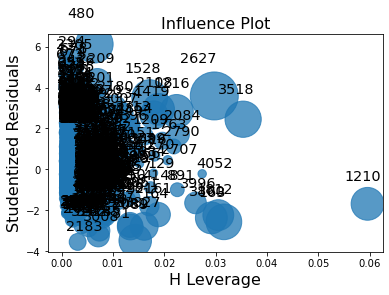

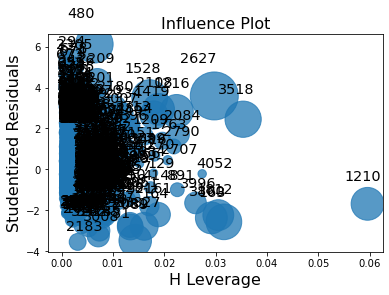

In [76]:
sm.graphics.influence_plot(ml2)

In [77]:
data_new=data.drop(data.index[[2627,3518,4052,3996,1210]])
ml3 = smf.ols('Rings~Sweight+Vweight+ssweight+Length+Diameter+Wweight',data=data_new).fit()
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     761.4
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:46:53   Log-Likelihood:                -9258.1
No. Observations:                4172   AIC:                         1.853e+04
Df Residuals:                    4165   BIC:                         1.857e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3112      0.269     12.318      0.000       2.784       3.838
Sweight      -21.1632      0.861    -24.585      0.000     -22.851     -19.476
Vweight       -9.8831      1.334     -7.411      0.000     -12.498      -7.269
ssweight       8.8705      1.179      7.525      0.000       6.559      11.182
Length        -1.6837      1.890     -0.891      0.373      -5.390       2.022
Diameter      16.0013      2.294      6.977      0.000      11.505      20.498
Wweight        9.9528      0.772     12.891      0.000       8.439      11.466
==============================================================================
Omnibus:                      938.394   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2521.270
Skew:                           1.195   Prob(JB):                         0.00
Kurtosis:                       5.964   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Power Transformation

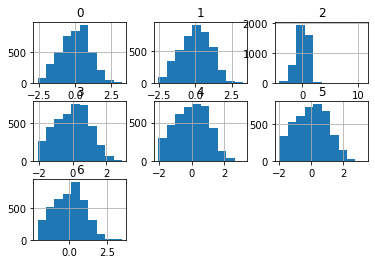

In [78]:
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
data = pd.read_csv(r"D:\A.csv")
data=data.drop(["Sex"],axis=1)
target = data.values[:,-1]
data1 = data.values[:, :-1]
pt = PowerTransformer(method='yeo-johnson')
data1 = pt.fit_transform(data1)
data = DataFrame(data1)
data.hist()
pyplot.show()

In [79]:
#Taking new data since the previous variable had been changed a lot 
data_CL = pd.read_csv(r"D:\A.csv")
data_CL=data_CL.drop("Sex",axis=1)
target=data_CL["Rings"]

In [80]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
data_CL = pt.fit_transform(data_CL)

In [81]:
F_CL=data_CL
T_CL=target

CL_LR=LR(F_CL,T_CL)
CL_DT=DT(F_CL,T_CL)
CL_RF=RF(F_CL,T_CL)
CL_KNN=KNN(F_CL,T_CL)
CL_AB=AB(F_CL,T_CL)
CL_SVR=SV(F_CL,T_CL)
CL_BC=BC(F_CL,T_CL)
CL_GBC=GBC(F_CL,T_CL)



ORIGINAL = pd.DataFrame({
"Model" : ["Linear Regression", "Decision Tree", "Random Forest","SVR", "KNN", "Ada Boost", "Boosting", "Gradient Boost"],
"Original RMSE" : [ORIGINAL_LR,ORIGINAL_DT,ORIGINAL_RF,ORIGINAL_SVR,ORIGINAL_KNN,ORIGINAL_AB,ORIGINAL_BC,ORIGINAL_GBC],
    "Without Diameter RMSE": [WT_D_LR,WT_D_DT,WT_D_RF,WT_D_SVR,WT_D_KNN,WT_D_AB,WT_D_BC,WT_D_GBC],
    "Without Diameter and WW RMSE": [WT_DWw_LR,WT_DWw_DT,WT_DWw_RF,WT_DWw_SVR,WT_DWw_KNN,WT_DWw_AB,WT_DWw_BC,WT_DWw_GBC],
    "Power Transformation RMSE" : [CL_LR,CL_DT,CL_RF,CL_KNN,CL_AB,CL_SVR,CL_BC,CL_GBC]
})

print(ORIGINAL)

               Model  Original RMSE  Without Diameter RMSE  \
0  Linear Regression       2.224529               2.224529   
1      Decision Tree       3.006037               2.987890   
2      Random Forest       2.355344               2.332522   
3                SVR       2.126135               2.126135   
4                KNN       2.216134               2.216134   
5          Ada Boost       2.925610               2.735127   
6           Boosting       2.326245               2.286028   
7     Gradient Boost       2.633251               2.633251   

   Without Diameter and WW RMSE  Power Transformation RMSE  
0                      2.224529                   0.599163  
1                      3.092600                   0.026929  
2                      2.287482                   0.038178  
3                      2.126135                   0.425278  
4                      2.216134                   0.407904  
5                      2.832891                   0.506879  
6             